# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [2]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

wine = pd.read_csv('winequality_edited.csv')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [3]:
# Use query to select each group and get its mean quality
median_alcohol = wine['alcohol'].median()
print(median_alcohol)

low_alcohol = wine.query('alcohol <= 10.3')
high_alcohol = wine.query('alcohol > 10.3')

mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

print(mean_quality_low)
print(mean_quality_high)

10.3
5.484673748103186
6.161773891317926


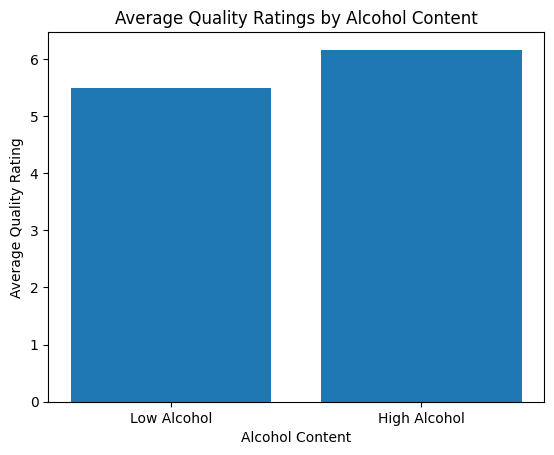

In [4]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low Alcohol', 'High Alcohol']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [6]:
# Use groupby to get the mean quality for each acidity level
acidity_quality_means = wine.groupby('acidity_levels')['quality'].mean()
acidity_quality_means

acidity_levels
high        5.783469
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

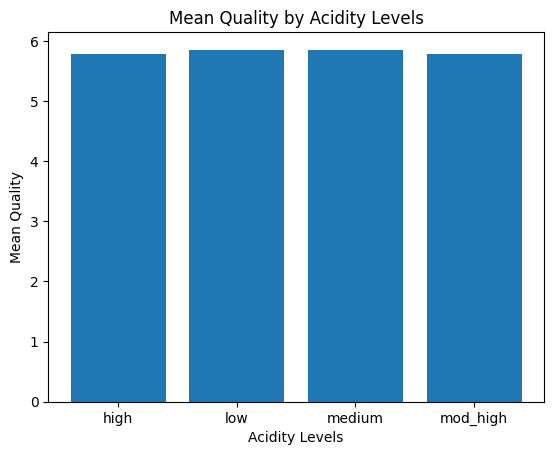

In [7]:
# Create a bar chart with proper labels
plt.bar(acidity_quality_means.index, acidity_quality_means.values)
plt.xlabel('Acidity Levels')
plt.ylabel('Mean Quality')
plt.title('Mean Quality by Acidity Levels')
plt.show()